<a href="https://colab.research.google.com/github/onuralpArsln/finTech/blob/main/sarima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import time
import requests

def getMassData(lastDay=1):
    url = 'https://api.binance.com/api/v3/klines'
    current_time = int(time.time() * 1000)
    startDay = current_time - ((lastDay + 364) * 24 * 60 * 60 * 1000)
    endDay = current_time - (lastDay * 24 * 60 * 60 * 1000)

    params = {
        'symbol': 'BTCUSDT',      # The trading pair you're interested in
        'interval': '1h',         # 1-hour candlestick data (hourly prices)
        'startTime': startDay,    # Data from 300 days ago
        'endTime': endDay,        # Data until lastDay
        'limit': 960             # Maximum number of data points per request
    }

    print(endDay - startDay)
    result = []
    while  startDay <  endDay - 86400000:
        time.sleep(1)
        print("calisyom")
        print(startDay)

        response = requests.get(url, params=params)
        data = response.json()
        print(data[-1:])

        if not data:  # Break if no more data is returned
            break

        for candle in data:
            close_price = candle[4]
            result.append(close_price)

        # Update startTime for the next request to get older data
        # The last candle's timestamp will be used to set the new startTime
        startDay = data[-1][0]  # Get the timestamp of the last candle
        params['startTime'] = startDay  # Set the new start time

    return result


In [ ]:
import csv

import pandas as pd

data = getMassData()

test_data = data[-10:]

train_data = data[:-10]


df = pd.DataFrame(data)

print("Size (shape):", df.shape)

df.to_csv('data/massData.csv', index=False, header=False)

31449600000
calisyom
1695476962075
[[1698930000000, '35351.12000000', '35367.11000000', '34680.00000000', '34926.96000000', '4493.79779000', 1698933599999, '157505329.83909820', 128024, '2103.25239000', '73714995.35326520', '0']]
calisyom
1698930000000
[[1702382400000, '41584.58000000', '41906.45000000', '41584.57000000', '41849.99000000', '1356.41499000', 1702385999999, '56670118.44096610', 53532, '746.48182000', '31187165.64148030', '0']]
calisyom
1702382400000
[[1705834800000, '41786.00000000', '41795.61000000', '41686.00000000', '41719.89000000', '401.37890000', 1705838399999, '16760023.31858480', 25127, '175.49606000', '7328293.97013910', '0']]
calisyom
1705834800000
[[1709287200000, '62129.14000000', '62188.00000000', '61859.29000000', '61991.11000000', '1774.98071000', 1709290799999, '110114669.61051010', 60737, '755.33864000', '46863145.65896760', '0']]
calisyom
1709287200000
[[1712739600000, '69011.92000000', '69171.75000000', '68902.43000000', '69139.20000000', '642.38466000'

In [1]:
import csv

import pandas as pd
url = "https://raw.githubusercontent.com/onuralpArsln/finTech/refs/heads/main/data/massData.csv"


df= pd.read_csv(url, header=None)
data=df.values.tolist()
single_dimensional_list = [item[0] for item in data]


In [2]:
data=single_dimensional_list

print(len(data))

test_amount = 50

test_data = data[-test_amount:]

train_data = data[:-test_amount]

8745


In [3]:
import numpy as np
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

# Example data (replace with your actual data)
data = train_data  # Replace with your data

# Ensure the data is fully numeric and clean up any non-numeric entries
# Convert data to a Pandas Series first
df = pd.Series(data)

# Attempt to convert all values to numeric, coercing non-numeric values to NaN
df = pd.to_numeric(df, errors='coerce')

# Drop any NaN values that were caused by non-numeric entries
df = df.dropna()

# Check if the conversion and cleaning worked
if df.isnull().values.any():
    raise ValueError("The data still contains non-numeric values after conversion.")

# Fit the SARIMAX model (adjust p, d, q, and seasonal parameters as needed)
model = SARIMAX(df, order=(5, 1, 2), seasonal_order=(1, 1, 1, 12))  # Adjust the order if necessary
model_fit = model.fit(disp=False)

# Forecast the next 10 values
forecast = model_fit.forecast(steps=test_amount)

# Print the forecasted values
print(forecast.to_list())
print(test_data)




[62597.87899584823, 62606.19561309198, 62588.77091261573, 62606.212955486284, 62600.014490497386, 62625.187850526134, 62642.38511103743, 62642.07729934751, 62658.96928418234, 62619.8440891804, 62605.70100746038, 62605.248039138845, 62607.971470371944, 62612.93373117856, 62618.53727514769, 62625.85670219992, 62616.639657221596, 62631.236506918875, 62649.60566468871, 62655.90359233167, 62656.647075697016, 62651.665519457834, 62643.108097058284, 62671.99769189707, 62670.16951903078, 62675.39234181682, 62678.902238182214, 62687.092831061695, 62678.13104779976, 62693.64029932493, 62711.88713771329, 62717.54845516174, 62719.73166355298, 62711.630716807915, 62702.55352471931, 62728.75694021231, 62727.3233355776, 62732.48259011094, 62736.16568317849, 62744.237944038476, 62735.237815951536, 62750.62530861677, 62768.86810464591, 62774.54762576457, 62776.58619620339, 62768.727610502945, 62759.68271818593, 62786.08971544636, 62784.606213163985, 62789.7328500734]
[62924.07, 63035.98, 62935.83, 6315

In [4]:
forecast_list = forecast.to_list()


list1 = [float(value) for value in forecast_list]
list2 = [float(value) for value in test_data]

"""
for i in range(len(list1)):
    print(int(list1[i]) - int(list2[i]))
"""

'\nfor i in range(len(list1)):\n    print(int(list1[i]) - int(list2[i]))\n'

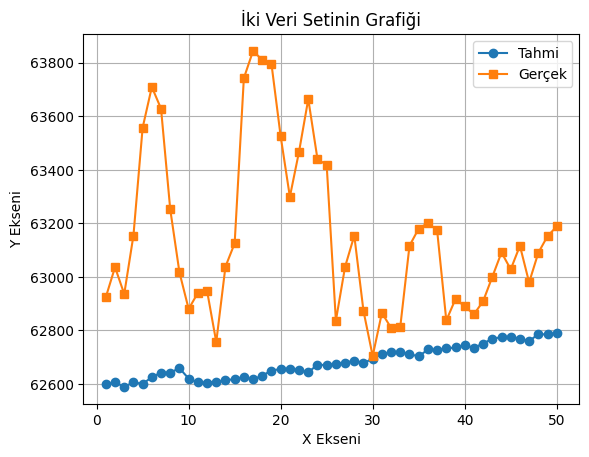

In [5]:
import matplotlib.pyplot as plt

# Örnek veriler
y1 = list1  # İlk Y ekseni verileri
y2 = list2   # İkinci Y ekseni verileri

# X eksenini otomatik olarak oluştur
x = range(1, len(y1) + 1)  # 1'den başlayarak y1'in uzunluğu kadar

# Grafiği çiz
plt.plot(x, y1, marker='o', label='Tahmi')  # İlk veri seti
plt.plot(x, y2, marker='s', label='Gerçek')  # İkinci veri seti

# Grafik özellikleri
plt.title('İki Veri Setinin Grafiği')  # Grafik başlığı
plt.xlabel('X Ekseni')  # X ekseni etiketi
plt.ylabel('Y Ekseni')  # Y ekseni etiketi
plt.legend()  # Legend ekle
plt.grid(True)  # Izgara çizgilerini göster
plt.show()  # Grafiği göster



**LSTM DENEMECESİ BURALAR** CHATGPT

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [7]:
# Örnek veri (son 1 yılın saatlik verisi) -> [timestamp, close_price]
# Bu verileri normalleştirmek için MinMaxScaler kullanıyoruz.
datal = np.array([data]).reshape(-1,1)  # verinizi numpy array'e çevirin

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(datal)

# Eğitim verisi hazırlama
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

# LSTM için veriyi zaman serisi formuna dönüştürme
def create_dataset(datal, time_step=60):
    X, y = [], []
    for i in range(len(datal) - time_step):
        X.append(datal[i:i + time_step, 0])
        y.append(datal[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 60  # Geçmiş 60 saatlik veriyi kullanarak tahmin yapacağız
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

# Veriyi LSTM'in kabul edeceği 3D şekle getirme (samples, time steps, features)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


In [8]:
# Modelin oluşturulması
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

# Modelin derlenmesi
model.compile(optimizer='adam', loss='mean_squared_error')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
# Modeli eğitme
model.fit(X_train, y_train, batch_size=64, epochs=20)


Epoch 1/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0492
Epoch 2/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 2.3553e-04
Epoch 3/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 2.1637e-04
Epoch 4/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 2.0592e-04
Epoch 5/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 2.0504e-04
Epoch 6/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 2.0469e-04
Epoch 7/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.1073e-04
Epoch 8/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.7729e-04
Epoch 9/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 2.0415e-04
Epoch 10/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.8804e-04
Epoch 11/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.7478e-04
Epoch 12/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.9294e-04
Epoch 13/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.7559e-04
Epoch 14/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.6737e-04
Epoc

In [12]:
# Test veri setinde tahmin yapma
predictions = model.predict(X_test)

# Tahmin sonuçlarını tersine çevirip orijinal fiyatlara dönüştürme
predictions = scaler.inverse_transform(predictions)

# Son 60 veriyi alıp gelecekteki 1 günü tahmin etme
last_60_days = np.array(data[-60:])  # NumPy array'e çevirme
scaled_last_60_days = scaler.transform(last_60_days.reshape(-1, 1))


X_input = scaled_last_60_days.reshape(1, -1, 1)
next_day_prediction = model.predict(X_input)
next_day_prediction = scaler.inverse_transform(next_day_prediction)

print("Tahmin edilen gelecek 1 gün fiyatı:", next_day_prediction[0][0])


53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Tahmin edilen gelecek 1 gün fiyatı: 62627.844


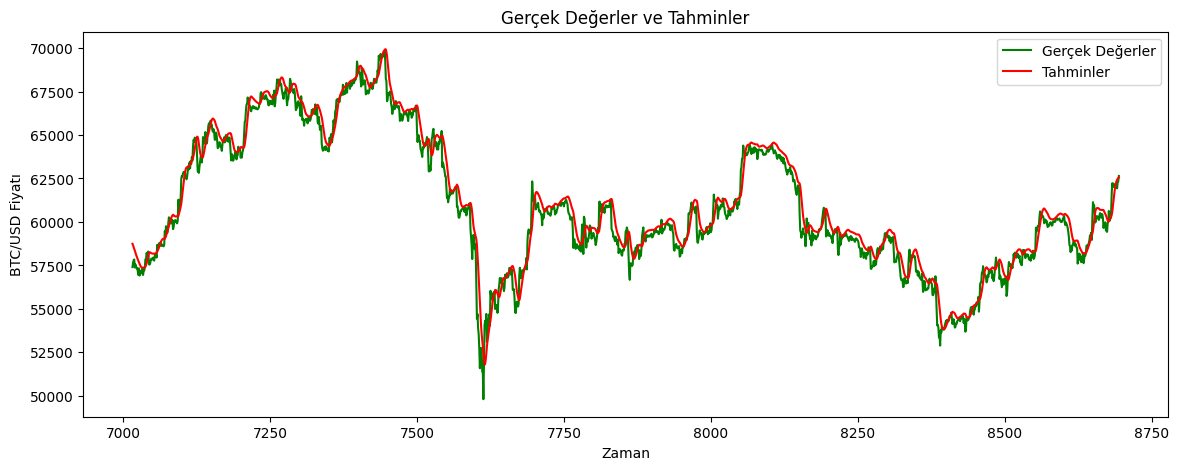

In [21]:
# Sadece tahmin ve gerçek değerleri çizdirme
plt.figure(figsize=(14, 5))
plt.plot(range(train_size + time_step, len(data)), true_values, color='green', label='Gerçek Değerler')
plt.plot(range(train_size + time_step, len(data)), predictions, color='red', label='Tahminler')
plt.legend()
plt.title('Gerçek Değerler ve Tahminler')
plt.xlabel('Zaman')
plt.ylabel('BTC/USD Fiyatı')
plt.show()


In [20]:
# Test setinden gerçek değerleri alıyoruz (tahminlere uygun olan kısmı seçiyoruz)
true_values = scaler.inverse_transform(test_data[time_step:])  # Zaman adımı kadar kaydırma yapılır

# Tahminler ve gerçek değerler için tablo oluşturuyoruz
comparison = pd.DataFrame({'Gerçek Değerler': true_values.flatten(), 'Tahminler': predictions.flatten(), 'fark': true_values.flatten() - predictions.flatten()})

comparison['fark'] = comparison['fark'].abs()
# İlk 10 değeri gösterelim
print(comparison.tail(10))

print(comparison['fark'].max())
print(comparison['fark'].min())



# İsterseniz tüm tabloyu da gösterebilirsiniz
# print(comparison)

      Gerçek Değerler     Tahminler        fark
1669         62204.32  61252.695312  951.624687
1670         62117.99  61561.269531  556.720469
1671         62082.00  61833.125000  248.875000
1672         61990.42  62056.687500   66.267500
1673         62020.60  62222.781250  202.181250
1674         62093.99  62342.500000  248.510000
1675         61932.00  62429.484375  497.484375
1676         62272.01  62471.875000  199.865000
1677         62320.01  62516.468750  196.458750
1678         62645.44  62559.386719   86.053281
4236.869531250006
0.0625
